### **1. Introducción**
El objetivo de este trabajo es diseñar y desarrollar una máquina de búsqueda que permita a los usuarios realizar 
consultas utilizando imágenes en lugar de texto. Este sistema debe ser capaz de encontrar imágenes similares dentro 
de una base de datos dada. EI proyecto se dividirá en varias fases, que se describen a continuación.

## **2. Fases del Proyecto**

### **2.1. Adquisición de Datos**

**Objetivo:** Obtener y preparar el dataset Caltech101.

**Tareas:**
- Descargar el dataset.
- Descomprimir y organizar los archivos.


### **2.2. Preprocesamiento**

**Objetivo:** Preparar los datos para su análisis.

**Tareas:**
- Usar técnicas de preprocesamiento de imágenes, como normalización, reducción de tamaño, o eliminación de ruido.
- Documentar cada paso del preprocesamiento.


In [1]:
import tensorflow as tf
import os
from PIL import Image
from keras import layers, models
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [2]:
(train_dataset, test_dataset), dataset_info = tfds.load(
    name='caltech101:3.0.2',
    split=['train[:80%]', 'train[80%:]'],
    with_info=True,
    as_supervised=True,
    data_dir='data',
    download=True
)

num_classes = dataset_info.features['label'].num_classes

def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset.map(preprocess_image).shuffle(1000).batch(32)
test_dataset = test_dataset.map(preprocess_image).batch(32)

### **2.3. Extracción de Características**

**Objetivo:** Extraer las características de las imágenes en una forma que los algoritmos puedan procesar.

**Tareas:**
- Utilizar un modelo de red neuronal convolucional (CNN) para extraer características de las imágenes.
- Entrenar un modelo desde cero o utilizar un modelo preentrenado y aplicar transfer learning.
- Documentar los métodos y resultados obtenidos.


In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# Cargar el modelo VGG16 preentrenado
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = Model(inputs=base_model.input, outputs=base_model.layers[-1].output)

# Función para extraer características
def extract_features(dataset):
    features = []
    labels = []
    images = []
    for images_batch, lbls in dataset:
        feature_maps = model.predict(images_batch)
        features.append(feature_maps)
        labels.append(lbls.numpy())
        images.append(images_batch.numpy())
    return features, labels, images

# Extraer características de los conjuntos de datos de entrenamiento y prueba
train_features, train_labels, train_images = extract_features(train_dataset)
test_features, test_labels, test_images = extract_features(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2

In [4]:
# Flatten the feature maps to create feature vectors
train_features_flat = np.array([feature.flatten() for batch in train_features for feature in batch])
train_labels_flat = np.array([label for batch in train_labels for label in batch])
train_images_flat = np.array([image for batch in train_images for image in batch])

test_features_flat = np.array([feature.flatten() for batch in test_features for feature in batch])
test_labels_flat = np.array([label for batch in test_labels for label in batch])
test_images_flat = np.array([image for batch in test_images for image in batch])


In [5]:
import pickle

# Guardar variables
with open('Saves/train_features.pkl', 'wb') as f:
    pickle.dump(train_features_flat, f)

with open('Saves/train_labels.pkl', 'wb') as f:
    pickle.dump(train_labels_flat, f)

with open('Saves/train_images.pkl', 'wb') as f:
    pickle.dump(train_images_flat, f)


In [ ]:
# Cargar las características y etiquetas guardadas
train_features_flat = np.load('Saves/train_features.npy')
train_labels_flat = np.load('Saves/train_labels.npy')
test_features_flat = np.load('Saves/test_features.npy')
test_labels_flat = np.load('Saves/test_labels.npy')

### **2.4. Indexación**

**Objetivo:** Crear un índice que permita búsquedas eficientes.

**Tareas:**
- Desarrollar un sistema para indexar las características extraídas de las imágenes y permitir la búsqueda eficiente de imágenes similares.
- Considerar técnicas como k-NN o índices especializados como KD-Trees o LSH (Locality-Sensitive Hashing).
- Documentar el proceso de construcción del índice.


In [6]:
# Example query: Retrieve the 5 nearest neighbors for a test image
from sklearn.neighbors import NearestNeighbors

# Fit the NearestNeighbors model
nn_model = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(train_features_flat)

# Extract features from a single query image
query_image, _ = next(iter(test_dataset.take(1)))
query_image = query_image[5]  # Get the image in the batch
query_image = tf.expand_dims(query_image, axis=0)  # Add batch dimension
query_features = model.predict(query_image).flatten().reshape(1, -1)
query_image_display = query_image.numpy()

# Find the nearest neighbors
distances, indices = nn_model.kneighbors(query_features)
print("Indices of nearest neighbors:", indices)
print("Distances to nearest neighbors:", distances)

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
Indices of nearest neighbors: [[ 137 1262 2059 1120  574]]
Distances to nearest neighbors: [[34.1787714  35.0095467  35.55769701 35.92212787 36.57983998]]


### **2.5. Diseño del Motor de Búsqueda**

**Objetivo:** Implementar la funcionalidad de búsqueda.

**Tareas:**
- Desarrollar la lógica para procesar consultas de usuarios a partir de imágenes.
- Desarrollar un algoritmo de ranking para ordenar los resultados.
- Documentar la arquitectura y los algoritmos utilizados.


In [7]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
# Función para normalizar y recuperar imágenes similares
def retrieve_similar_images(query_feature, train_features, train_labels, train_images, top_n=5):
    query_feature = normalize([query_feature], axis=1)
    similarities = cosine_similarity(query_feature, train_features)[0]
    nearest_indices = np.argsort(similarities)[::-1][:top_n]
    return train_labels[nearest_indices], similarities[nearest_indices], train_images[nearest_indices]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
Etiquetas similares: [80 39 30 39 34]
Similitudes similares: [0.87696485 0.87281852 0.8720734  0.86872185 0.86740914]


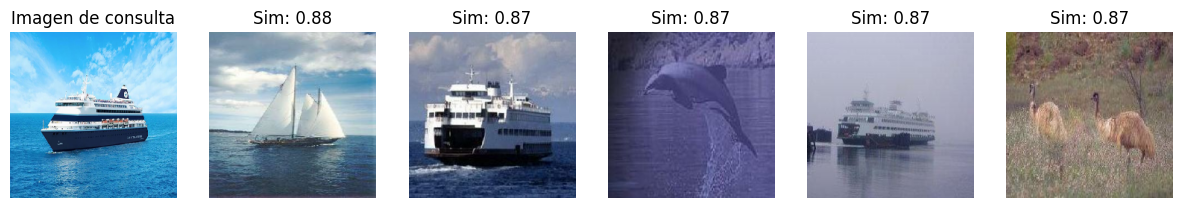

In [9]:
def preprocess_image_for_query(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    return image


# Supón que `query_image` es la imagen que quieres usar como consulta
query_image = "pruebas/Barco3.png"
query_image_preprocessed = preprocess_image_for_query(query_image)

# Extrae características de la imagen de consulta
query_feature = model.predict(np.expand_dims(query_image_preprocessed, axis=0)).flatten()
query_feature = normalize([query_feature], axis=1)[0]

# Recuperar las imágenes más similares
similar_labels, similar_similarities, similar_images = retrieve_similar_images(
    query_feature, train_features_flat, train_labels_flat, train_images_flat
)
print("Etiquetas similares:", similar_labels)
print("Similitudes similares:", similar_similarities)

# Mostrar la imagen de consulta y las imágenes similares
plt.figure(figsize=(15, 5))

# Mostrar la imagen de consulta
plt.subplot(1, 6, 1)
plt.imshow(query_image_preprocessed)
plt.title("Imagen de consulta")
plt.axis('off')

# Mostrar las imágenes similares
for i in range(len(similar_images)):
    plt.subplot(1, 6, i + 2)
    plt.imshow(similar_images[i])
    plt.title(f"Sim: {similar_similarities[i]:.2f}")
    plt.axis('off')

plt.show()


### **2.6. Evaluación del Sistema**

**Objetivo:** Medir la efectividad del sistema.

**Tareas:**
- Definir un conjunto de métricas de evaluación (precisión, recall, F1-score).
- Definir un benchmark para evaluación del sistema.
- Comparar el rendimiento de diferentes configuraciones del sistema.
- Documentar los resultados y análisis.


In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_system(y_true, y_pred, average='weighted'):
    precision = precision_score(y_true, y_pred, average=average, zero_division=0)
    recall = recall_score(y_true, y_pred, average=average, zero_division=0)
    f1 = f1_score(y_true, y_pred, average=average, zero_division=0)
    return precision, recall, f1

In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

def evaluate_system(y_true, y_pred, average='weighted'):
    precision = precision_score(y_true, y_pred, average=average, zero_division=0)
    recall = recall_score(y_true, y_pred, average=average, zero_division=0)
    f1 = f1_score(y_true, y_pred, average=average, zero_division=0)
    return precision, recall, f1

# Ejemplo de datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(train_features_flat, train_labels_flat, test_size=0.2, random_state=42)

# Configuración 1: KNN con k=5
knn_1 = KNeighborsClassifier(n_neighbors=5)
knn_1.fit(X_train, y_train)
y_pred_1 = knn_1.predict(X_test)
precision_1, recall_1, f1_1 = evaluate_system(y_test, y_pred_1)
print(f"Configuración 1 - Precision: {precision_1:.2f}, Recall: {recall_1:.2f}, F1-score: {f1_1:.2f}")

# Configuración 2: KNN con k=10
knn_2 = KNeighborsClassifier(n_neighbors=10)
knn_2.fit(X_train, y_train)
y_pred_2 = knn_2.predict(X_test)
precision_2, recall_2, f1_2 = evaluate_system(y_test, y_pred_2)
print(f"Configuración 2 - Precision: {precision_2:.2f}, Recall: {recall_2:.2f}, F1-score: {f1_2:.2f}")

Configuración 1 - Precision: 0.56, Recall: 0.43, F1-score: 0.43
Configuración 2 - Precision: 0.54, Recall: 0.42, F1-score: 0.42
